In [1]:
pip install dython

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import math
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import scipy.stats as ss
from dython import nominal
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import re
import string
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer

#tf-idf libraries 

from sklearn.feature_extraction.text import TfidfVectorizer


In [5]:
df=pd.read_csv("/Users/vinatigattupalli/Github_Classification/Datasets/Processed_Data/Repo_cleaned.csv",low_memory=False,index_col=0)

In [6]:
df_repo=df[['repo_name','repository_description','repository_language']]

In [7]:
df_repo.repository_language.unique()

array(['PHP', 'Shell', 'Java', 'other', 'JavaScript', 'CSS',
       'Objective-C', 'Python', 'C', 'C++', 'Ruby', 'C#'], dtype=object)

In [8]:
# Finding lenth of the text
Length_of_Text=df_repo.repository_description.apply(len)

Text(0.5, 1.0, 'Frequency of text-length')

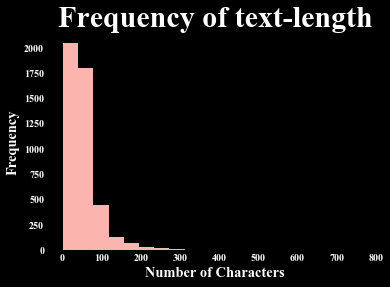

In [299]:
Length_of_Text.plot(kind='hist',bins=20,colormap='Pastel1');
plt.xlabel("Number of Characters");
plt.title('Frequency of text-length')

## Converting all letters to Lower or Upper case


In [234]:
def text_cleaning(text):
    stop = set(stopwords.words('english'))
#   text = text.lower()
    regex = re.compile('[' +re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    text = regex.sub(" ", text) # remove punctuation
    #stripping 
    text=text.strip()
    tokenizer = RegexpTokenizer("[\w']+")
    tokens=tokenizer.tokenize(text)
    filtered_tokens= [word for word in tokens if not word in stop]
    filtered_tokens= [w.lower() for w in filtered_tokens]
    return filtered_tokens


In [235]:
df_repo['tokens']=df_repo.repository_description.apply(text_cleaning)

/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [236]:
df_repo[['repository_description','tokens']].head()

,repository_description,tokens
2414,ZF2 Based CMS that provides a highly-WYSIWYG i...,"[zf, based, cms, provides, highly, wysiwyg, in..."
2412,Vagrant base boxes for my projects as vbkick d...,"[vagrant, base, boxes, projects, vbkick, defin..."
2410,Provides when.java wrappers for standard vert....,"[provides, java, wrappers, standard, vert, x, ..."
2408,Fatty Acids and Stable Isotopes in R,"[fatty, acids, stable, isotopes, r]"
2426,A repo to test github api,"[a, repo, test, github, api]"


In [237]:
for description, tokens in zip(df_repo['repository_description'].head(),
                              df_repo['tokens'].head()):
    print('description:', description)
    print('tokens:', tokens)
    print()

description: ZF2 Based CMS that provides a highly-WYSIWYG interface and allows you to easily create plugins by writing ZF2 modules.
tokens: ['zf', 'based', 'cms', 'provides', 'highly', 'wysiwyg', 'interface', 'allows', 'easily', 'create', 'plugins', 'writing', 'zf', 'modules']

description: Vagrant base boxes for my projects as vbkick definitions
tokens: ['vagrant', 'base', 'boxes', 'projects', 'vbkick', 'definitions']

description: Provides when.java wrappers for standard vert.x objects to return promises.
tokens: ['provides', 'java', 'wrappers', 'standard', 'vert', 'x', 'objects', 'return', 'promises']

description: Fatty Acids and Stable Isotopes in R
tokens: ['fatty', 'acids', 'stable', 'isotopes', 'r']

description: A repo to test github api
tokens: ['a', 'repo', 'test', 'github', 'api']



## Exploratory Data Analysis for pre-processed text-WordCloud

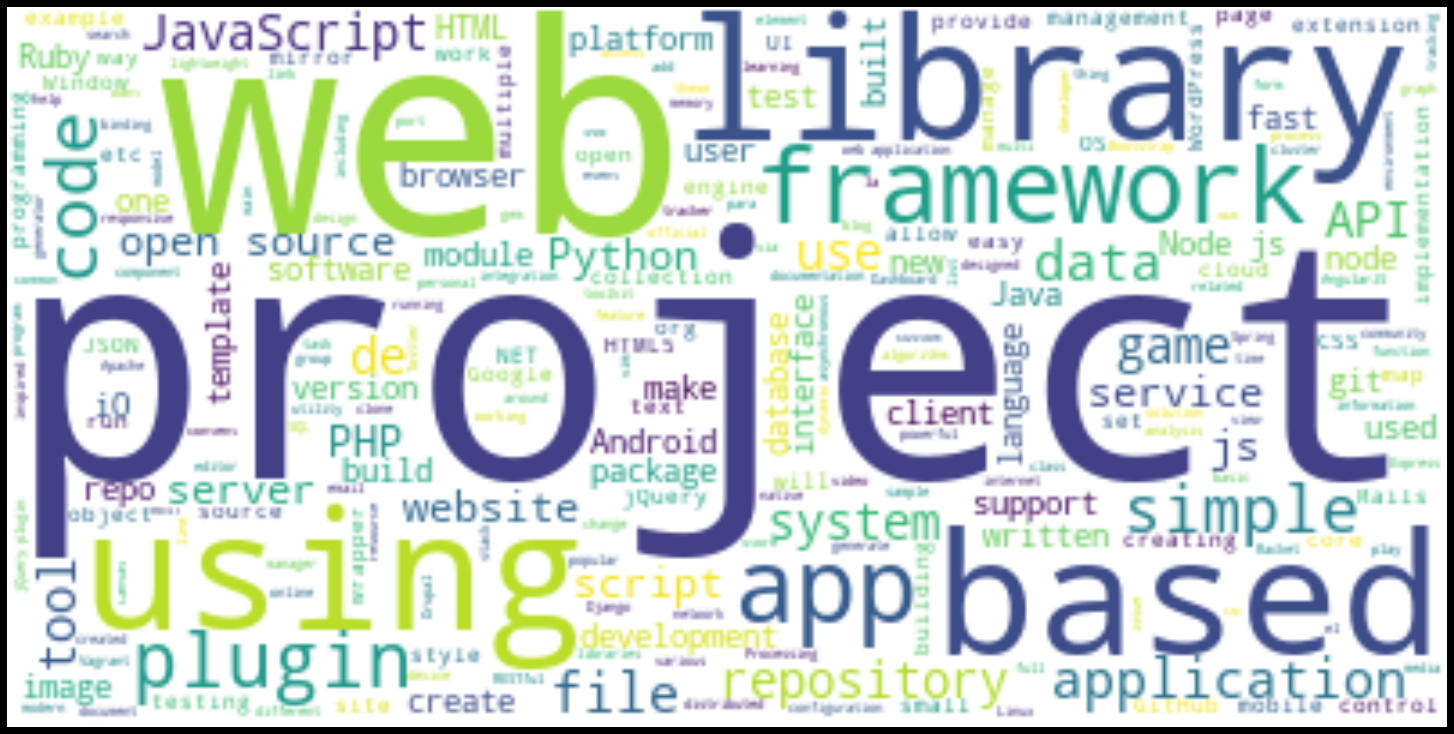

In [247]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ''.join(df_repo['repository_description'].values)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate_from_text(long_string)
# Visualize the word cloud
# 
# plt.axis("off")
# plt.show()
# wordcloud.to_image();
# wordcloud.to_file("/Users/vinatigattupalli/Github_Classification/Visualizations/wordcloud.png")
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [248]:
plt.savefig("/Users/vinatigattupalli/Github_Classification/Visualizations/wordcloud.png", facecolor='k', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [249]:
# getting the word clouds category wise
lan_repo_dict=dict()
    
#making a dictionary with key as category and value as text
for cat in df_repo.repository_language:
    text=''.join((df_repo.loc[df_repo['repository_language']==cat, 'repository_description']).values)
    lan_repo_dict[cat]=text

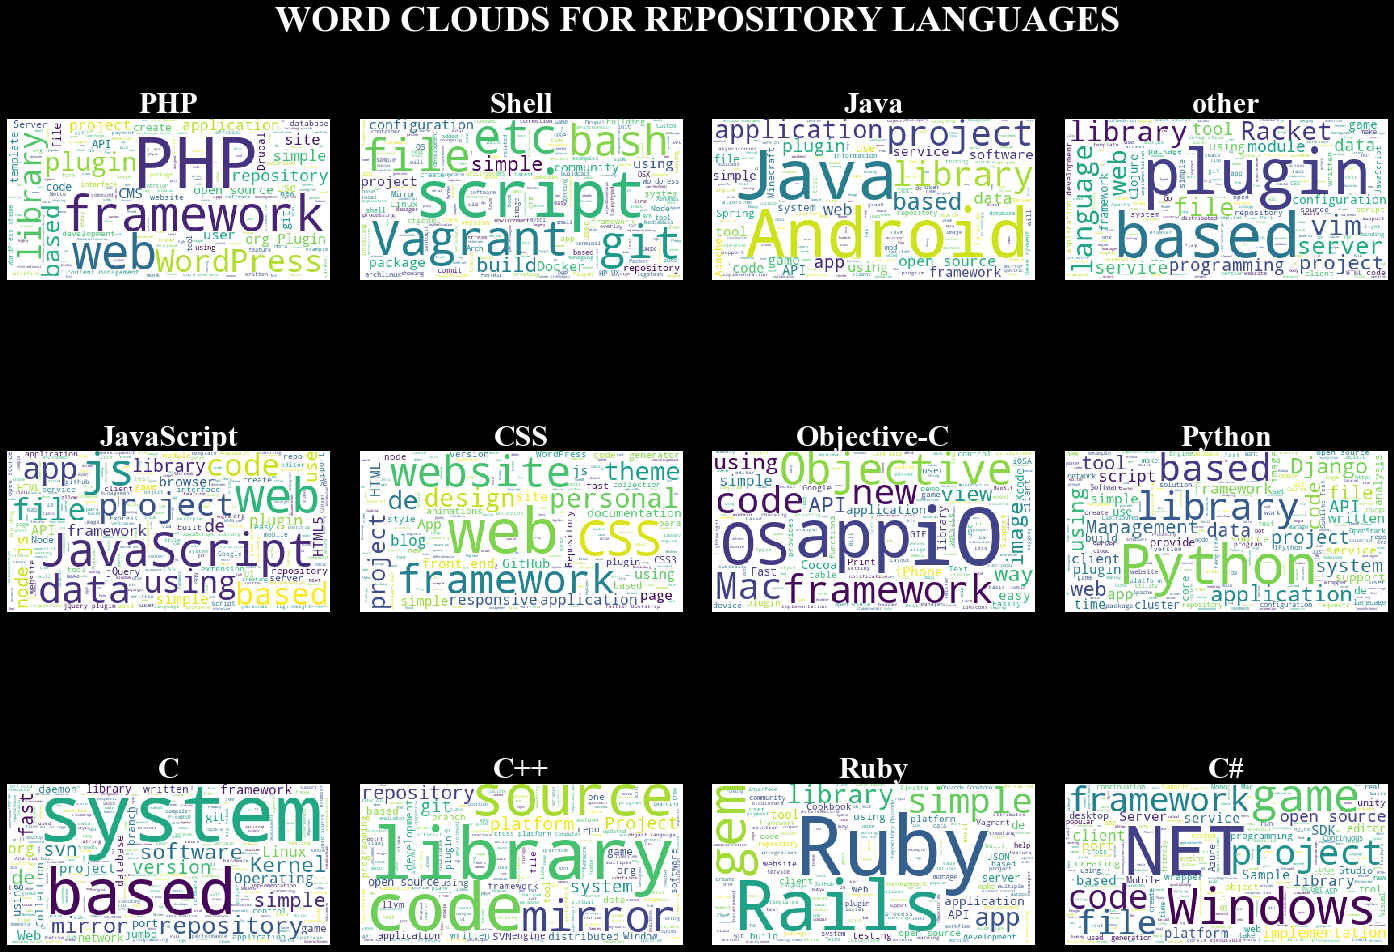

<Figure size 432x288 with 0 Axes>

In [301]:
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor']= 'red'
plt.rcParams['font.size']=30
plt.rcParams['font.weight']='normal'
plt.rcParams['axes.titlesize']=30
plt.rcParams['axes.labelsize']='x-large'
i=1
f = plt.figure(figsize=(20,20), facecolor='k')
for cat in lan_repo_dict.keys():
    #import pdb; pdb.set_trace(),
    f.add_subplot(4,4,i).set_title(cat)
    plt.plot()
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
    # Generate a word cloud
    wordcloud.generate_from_text(lan_repo_dict[cat])
    
#   plt.figure( figsize=(5,5), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    
    plt.tight_layout(pad=1)
    i=i+1
plt.suptitle('WORD CLOUDS FOR REPOSITORY LANGUAGES') 
    
plt.show()

#f.set_title("Word clouds for repository_languages")
#fig.suptitle("Word clouds for repository_languages")
    
plt.savefig("/Users/vinatigattupalli/Github_Classification/Data-Visualizations/wordcloud_languages.png", facecolor='k', bbox_inches='tight')

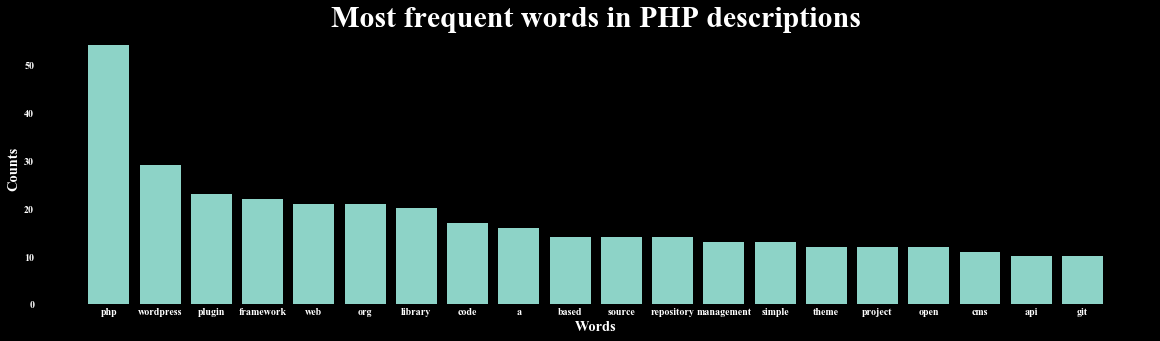

In [252]:
# find the most common words for the top 4 categories
stop = set(stopwords.words('english'))
filtered_tokens=text_cleaning(lan_repo_dict['PHP'])
PHP100 = Counter(filtered_tokens).most_common(20)
df_php = pd.DataFrame(PHP100, columns = ['Word', 'Count'])
#df_php.plot(kind='bar',use_index=False)
plt.style.use('dark_background')
plt.rcParams['font.size']=10
plt.figure(figsize=(20,5))
plt.title("Most frequent words in PHP descriptions")
plt.xlabel('Words')
plt.ylabel('Counts')
plt.bar(df_php.Word,df_php.Count);
#t_desc['Beauty']).most_common(100)
# kids100 = Counter(cat_desc['Kids']).most_common(100)
# electronics100 = Counter(cat_desc['Electronics']).most_common(100)

## Term Frequency- Inverse term frequency( TF-IDF)

In [285]:
vectorizer = TfidfVectorizer(min_df=10,
                             max_features=180000,
                             tokenizer=tokenizer.tokenize,
                             ngram_range=(1, 2),stop_words=stop)

In [286]:
all_desc = df_repo['repository_description'].values
vz = vectorizer.fit_transform(list(all_desc))

In [294]:
vz

<4570x516 sparse matrix of type '<class 'numpy.float64'>'
	with 14467 stored elements in Compressed Sparse Row format>

In [290]:
#  create a dictionary mapping the tokens to their tfidf values
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(
                    dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

In [293]:
tfidf.sort_values(by=['tfidf'], ascending=False).head(10)

,tfidf
pdf,7.029592
security,7.029592
tasks,7.029592
issues,7.029592
tiny,7.029592
repositorio,7.029592
contains,7.029592
computing,7.029592
redis,7.029592
kernel,7.029592
